In [3]:
import pandas as pd

# Provide the file path or URL to the XLSX file
file_path = "SmartWay Vehicle List for MY 2023.xlsx"

# Read the XLSX file into a pandas DataFrame
df = pd.read_excel(file_path)

# Now you can work with the DataFrame (e.g., perform analysis, manipulate data)
# For example, you can print the first few rows of the DataFrame
print(df.head())


                      Model  Displ  Cyl   Trans Drive         Fuel  \
0            AUDI Q4 e-tron    NaN  NaN  Auto-1   2WD  Electricity   
1            AUDI Q4 e-tron    NaN  NaN  Auto-1   2WD  Electricity   
2  AUDI Q4 e-tron Sportback    NaN  NaN  Auto-1   4WD  Electricity   
3  AUDI Q4 e-tron Sportback    NaN  NaN  Auto-1   4WD  Electricity   
4    AUDI Q4 e-tron quattro    NaN  NaN  Auto-1   4WD  Electricity   

  Cert Region  Stnd      Stnd Description  Underhood ID     Veh Class  \
0          FA  T3B0  Federal Tier 3 Bin 0  PVGAV00.0NZ4  standard SUV   
1          CA   ZEV        California ZEV  PVGAV00.0NZ4  standard SUV   
2          FA  T3B0  Federal Tier 3 Bin 0  PVGAT00.0NZ5  standard SUV   
3          CA   ZEV        California ZEV  PVGAT00.0NZ5  standard SUV   
4          FA  T3B0  Federal Tier 3 Bin 0  PVGAT00.0NZ5  standard SUV   

   Air Pollution Score City MPG Hwy MPG Cmb MPG  Greenhouse Gas Score SmartWay  
0                   10       30      36      33            

In [4]:
df.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [7]:
categorical_columns = []
for i in df.columns:
    if len(df[i].unique()) < 20:
        categorical_columns.append(i)

In [8]:
categorical_columns

['Displ',
 'Cyl',
 'Trans',
 'Drive',
 'Fuel',
 'Cert Region',
 'Stnd',
 'Stnd Description',
 'Veh Class',
 'Air Pollution Score',
 'Greenhouse Gas Score',
 'SmartWay']

In [10]:
df['Displ'].isna().sum()

284

In [12]:
df.drop(columns=['Displ','Cyl'], inplace=True)

In [13]:
df.columns

Index(['Model', 'Trans', 'Drive', 'Fuel', 'Cert Region', 'Stnd',
       'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [18]:
df['Company'] = df['Model'].apply(lambda x: x.split(" ")[0])

In [27]:
comapny_dist = df['Company'].value_counts()

([<matplotlib.axis.XTick at 0x1a711e9e580>,
 [Text(0.0, 0, 'TOYOTA'),
  Text(1.0, 0, 'HYUNDAI'),
  Text(2.0, 0, 'BMW'),
  Text(3.0, 0, 'KIA'),
  Text(4.0, 0, 'FORD'),
  Text(5.0, 0, 'MERCEDES-BENZ'),
  Text(6.0, 0, 'AUDI'),
  Text(7.0, 0, 'PORSCHE'),
  Text(8.0, 0, 'TESLA'),
  Text(9.0, 0, 'LUCID'),
  Text(10.0, 0, 'HONDA'),
  Text(11.0, 0, 'VOLKSWAGEN'),
  Text(12.0, 0, 'VOLVO'),
  Text(13.0, 0, 'NISSAN'),
  Text(14.0, 0, 'LEXUS'),
  Text(15.0, 0, 'RIVIAN'),
  Text(16.0, 0, 'POLESTAR'),
  Text(17.0, 0, 'GENESIS'),
  Text(18.0, 0, 'SUBARU'),
  Text(19.0, 0, 'CADILLAC'),
  Text(20.0, 0, 'CHEVROLET'),
  Text(21.0, 0, 'LAND'),
  Text(22.0, 0, 'JAGUAR'),
  Text(23.0, 0, 'LINCOLN'),
  Text(24.0, 0, 'MITSUBISHI'),
  Text(25.0, 0, 'MINI'),
  Text(26.0, 0, 'CRUISE'),
  Text(27.0, 0, 'MAZDA'),
  Text(28.0, 0, 'CHRYSLER'),
  Text(29.0, 0, 'LORDSTOWN'),
  Text(30.0, 0, 'JEEP')])

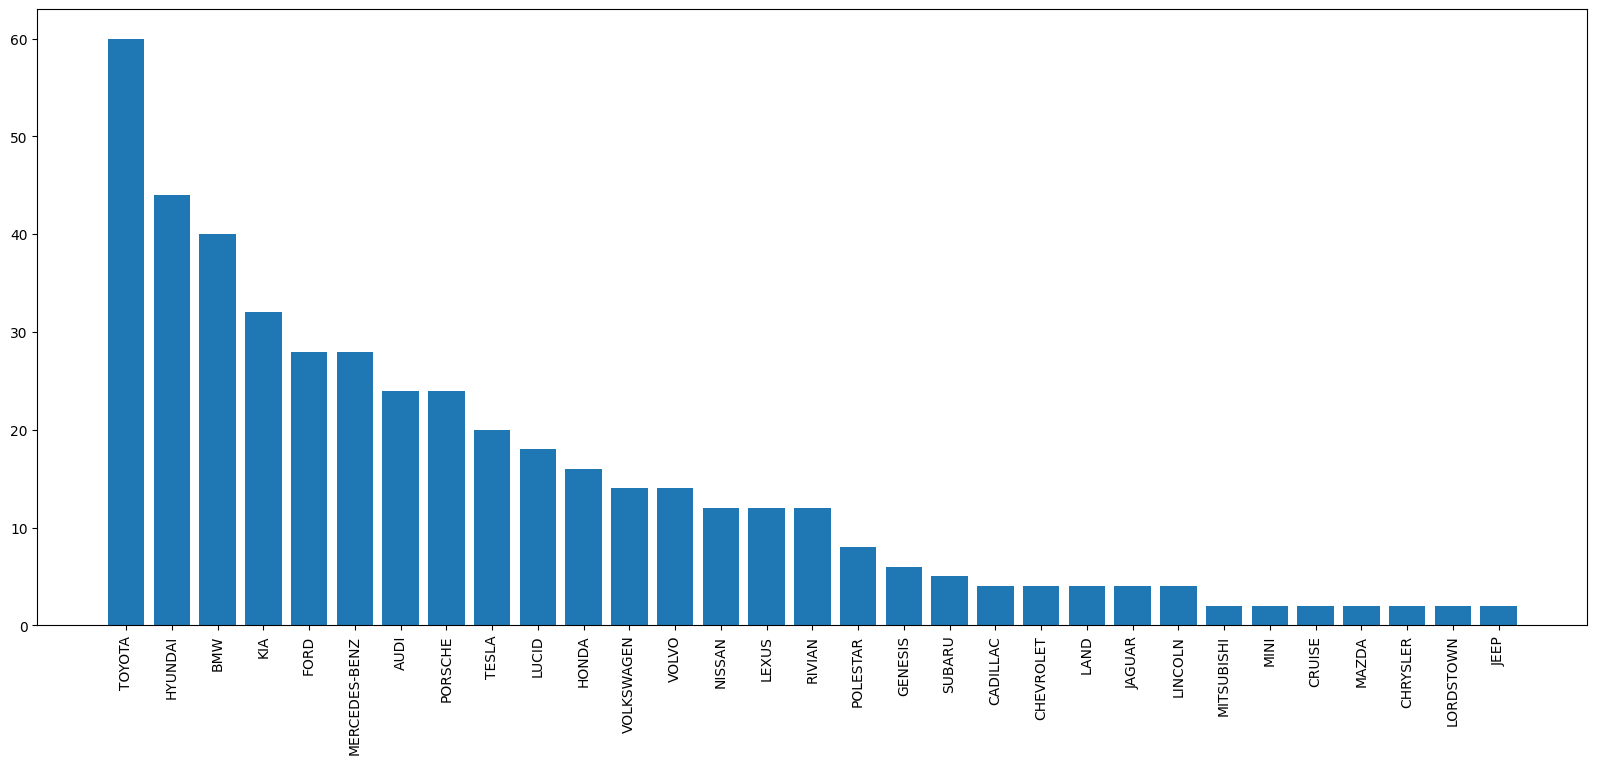

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(comapny_dist.index, comapny_dist.values)
plt.xticks(comapny_dist.index,rotation=90)

([<matplotlib.axis.XTick at 0x1a711947460>,
 [Text(0.0, 0, 'Auto-1'),
  Text(1.0, 0, 'CVT'),
  Text(2.0, 0, 'AMS-6'),
  Text(3.0, 0, 'SCV-6'),
  Text(4.0, 0, 'Auto-2'),
  Text(5.0, 0, 'SemiAuto-8'),
  Text(6.0, 0, 'SCV-10'),
  Text(7.0, 0, 'SCV-1'),
  Text(8.0, 0, 'AMS-7'),
  Text(9.0, 0, 'SCV-7'),
  Text(10.0, 0, 'Auto-8'),
  Text(11.0, 0, 'SemiAuto-10'),
  Text(12.0, 0, 'Man-6')])

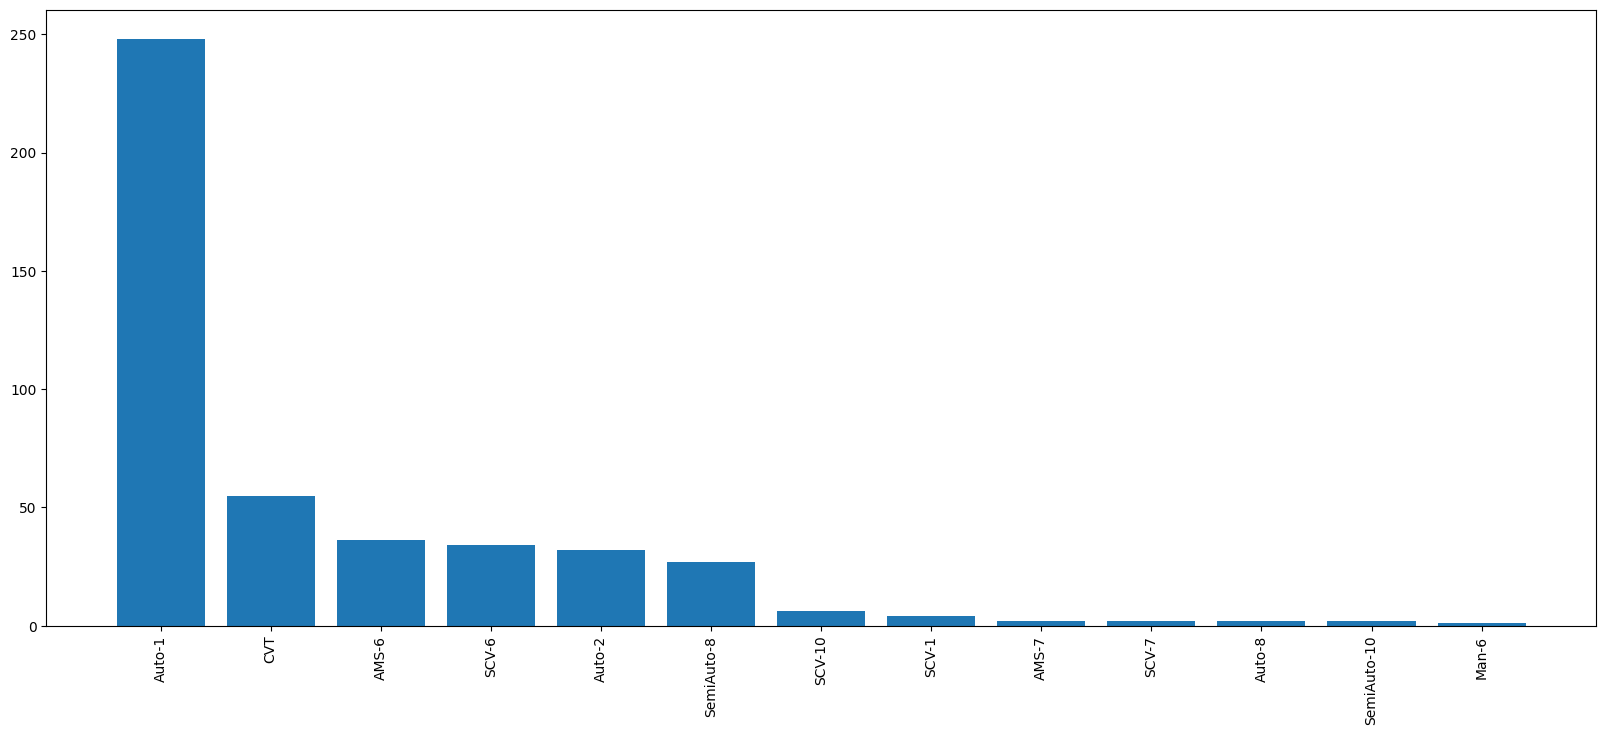

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(df['Trans'].value_counts().index, df['Trans'].value_counts().values)
plt.xticks(df['Trans'].value_counts().index,rotation=90)

In [33]:
numeric_columns = []
for i in df.columns:

    if i not in categorical_columns:
        numeric_columns.append(i)

In [38]:
fuel_dist = df['Fuel'].value_counts()

([<matplotlib.axis.XTick at 0x1a712363070>,
 [Text(0.0, 0, 'Electricity'),
  Text(1.0, 0, 'Gasoline'),
  Text(2.0, 0, 'Gasoline/Electricity'),
  Text(3.0, 0, 'Hydrogen')])

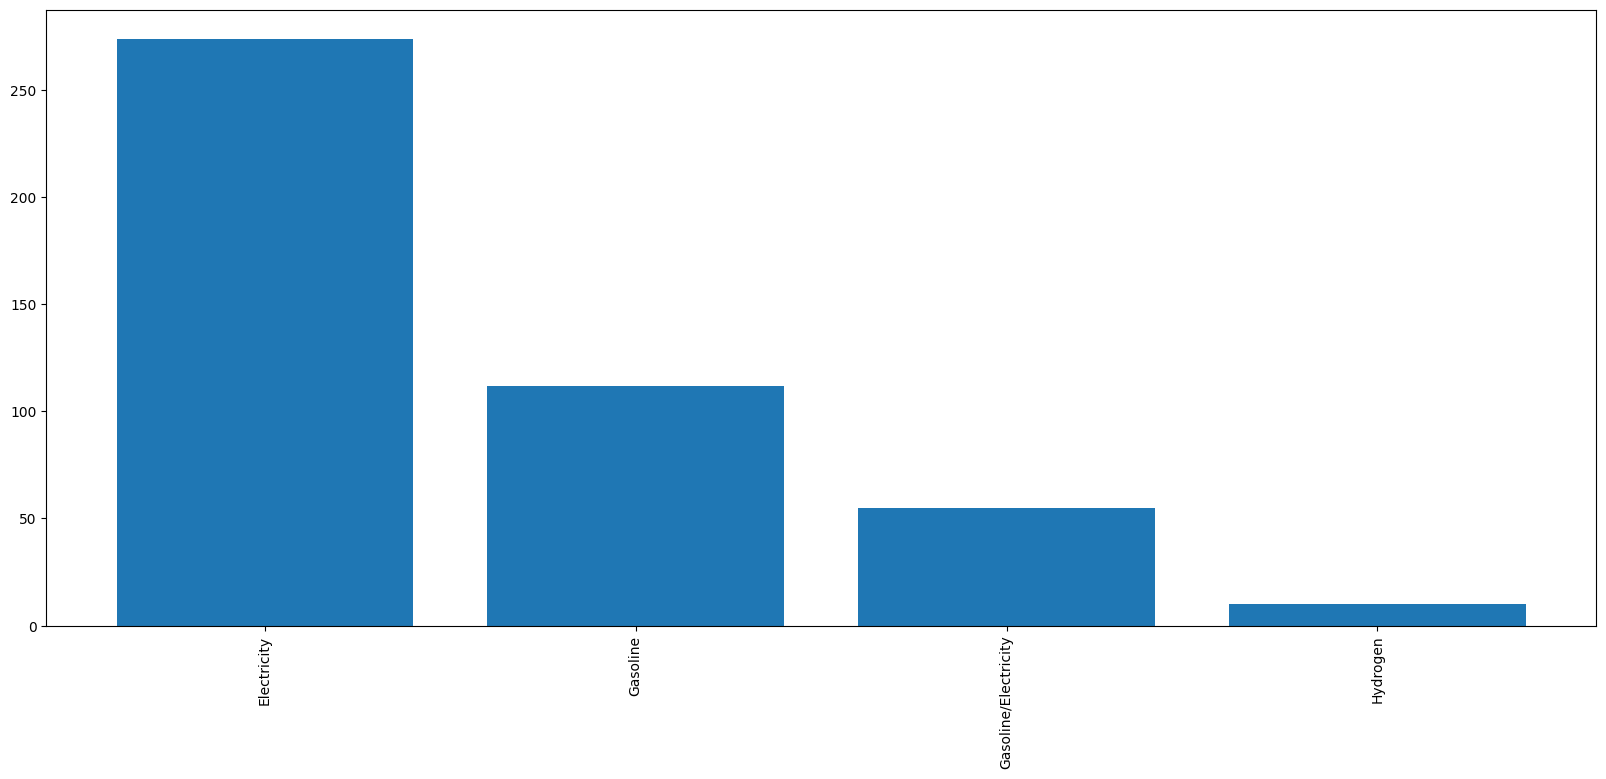

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(fuel_dist.index, fuel_dist.values)
plt.xticks(fuel_dist.index,rotation=90)

([<matplotlib.axis.XTick at 0x1a71230ff70>,
 [Text(0.0, 0, 'small SUV'),
  Text(1.0, 0, 'midsize car'),
  Text(2.0, 0, 'small car'),
  Text(3.0, 0, 'standard SUV'),
  Text(4.0, 0, 'large car'),
  Text(5.0, 0, 'station wagon'),
  Text(6.0, 0, 'pickup'),
  Text(7.0, 0, 'minivan')])

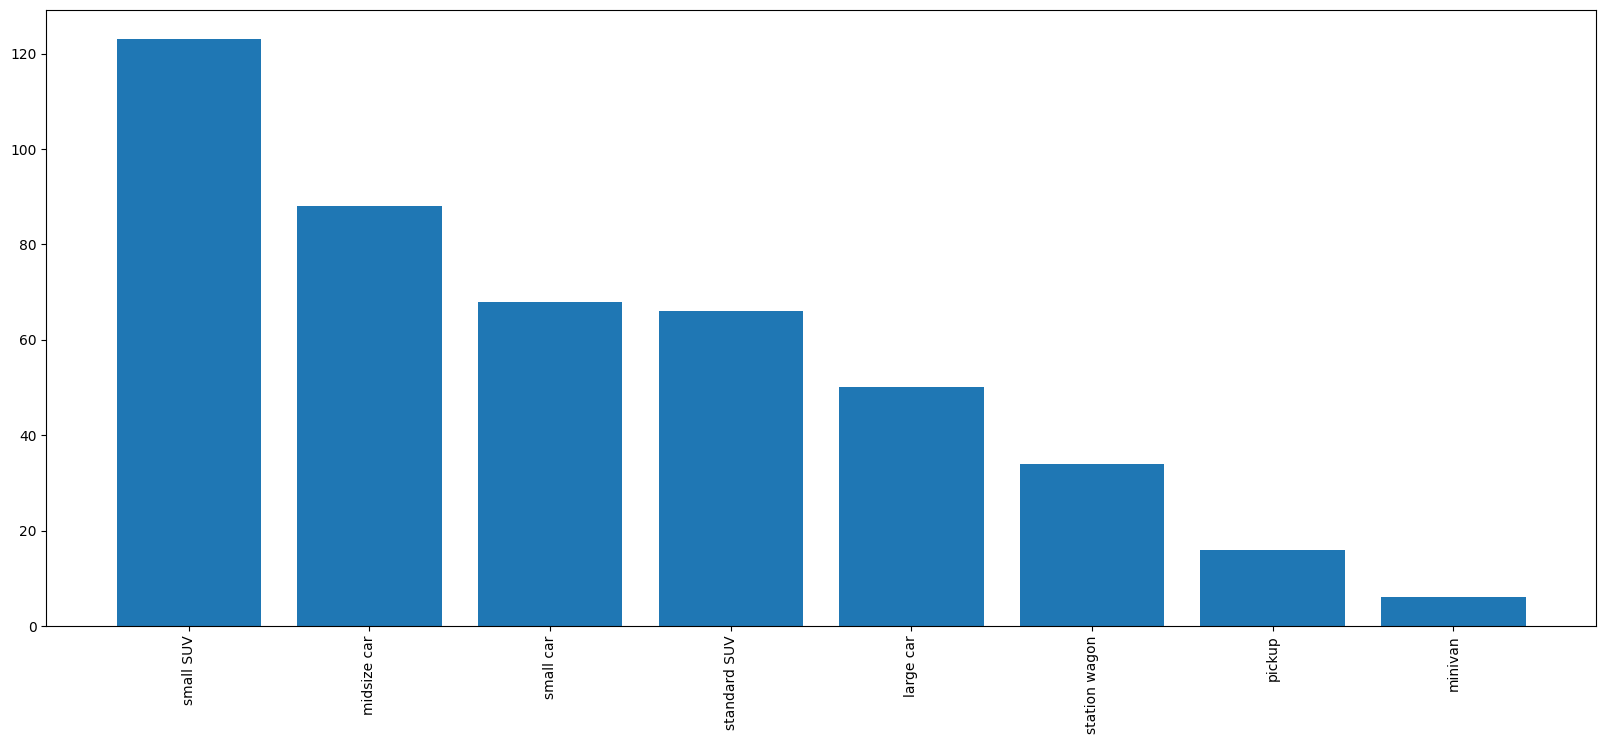

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(df['Veh Class'].value_counts().index, df['Veh Class'].value_counts().values)
plt.xticks(df['Veh Class'].value_counts().index,rotation=90)